In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import gradient_descent, plot_logreg_line, compute_cost, predict_proba, predict_label, normalize_feature

# Part 2 ~ Spam classification - email data
Logistic regression with gradient decent 

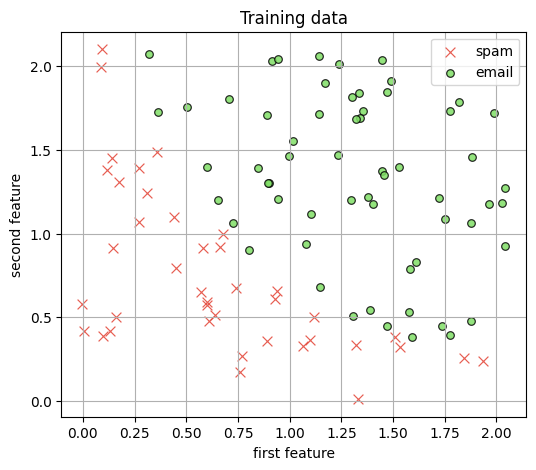

In [2]:
# ~ A ~ #
df = pd.read_csv("data\\email_data_1.csv", usecols=['x1','x2','y'])
x1 = df['x1'].values
x2 = df['x2'].values
y  = df['y'].values 

plt.figure(figsize=(6,5))
plt.scatter(x1[y==0], x2[y==0], c='#e34234', marker='x', s=50, linewidths=0.85, alpha=0.85, label='spam')
plt.scatter(x1[y==1], x2[y==1], c='#80df66', marker='o', s=30,edgecolors='k', linewidths=0.85, alpha=0.85, label='email')
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.title('Training data')
plt.legend(); plt.grid(); plt.show()

In [ ]:
# ~ B ~ Prepare data and compute initial cost/gradient ~ #
m = y.size
X_raw = np.column_stack((x1, x2))      
y = y.reshape(-1,1)                     
X = np.hstack([np.ones((m,1)), X_raw]) 
theta_init = np.zeros((X.shape[1],1))  

J0, grad0 = compute_cost(X, y, theta_init)
print(f"initial cost J(θ)= {J0[0][0]:.4f}")
print("initial gradient ∇J(θ) =", grad0.flatten())

initial cost J(θ)= 0.6931
initial gradient ∇J(θ) = [-0.1      -0.263366 -0.251911]


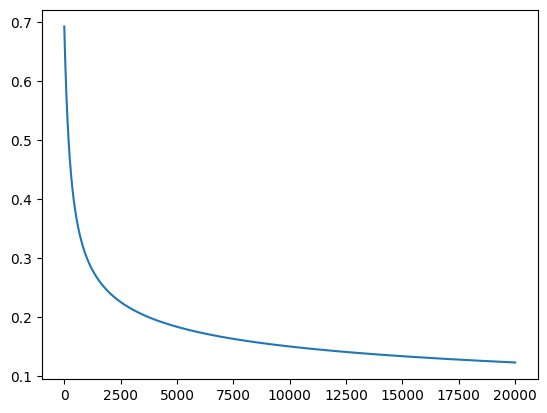

final cost (quadratic) = [0.123724]
theta_quad (norm) = [ 3.18222987  3.95897705  4.08286576 -1.62915912]


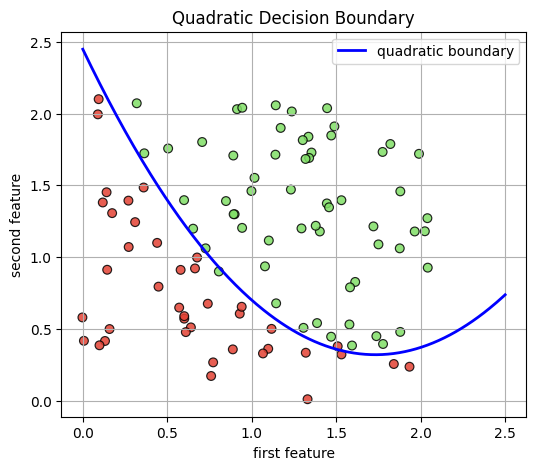

In [4]:
# ~ C ~ #
x1_norm, mu1, sigma1 = normalize_feature(x1)
x2_norm, mu2, sigma2 = normalize_feature(x2)
Xn_quad = np.column_stack([np.ones(m),x1_norm, x2_norm, x1_norm**2])  
theta_q = np.zeros((4,1))
alpha_q, iters_q = 0.01, 20000

theta_q, Jq = gradient_descent(Xn_quad, y, theta_q,alpha_q, iters_q, plot_flag=True, log_cost=True)

print(f"final cost (quadratic) = {Jq[-1]}")
print("theta_quad (norm) =", theta_q.flatten())


u = np.linspace(0, 2.5, 300) 
u_norm = (u - mu1) / sigma1    
# solve θ0 + θ1 uₙ + θ2 vₙ + θ3 uₙ² = 0  →  vₙ = ...
v_norm = -(theta_q[0] + theta_q[1]*u_norm + theta_q[3]*(u_norm**2)) / theta_q[2]
v = v_norm * sigma2 + mu2 

colors = ['#e34234' if yi==0 else '#80df66' for yi in y.flatten()]
plt.figure(figsize=(6,5))
plt.scatter(x1, x2, c=colors, s=40, edgecolors='k', linewidths=0.85, alpha=0.85)
plt.plot(u, v.flatten(), 'b-', linewidth=2, label='quadratic boundary')
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.title('Quadratic Decision Boundary')
plt.legend(); plt.grid(); plt.show()

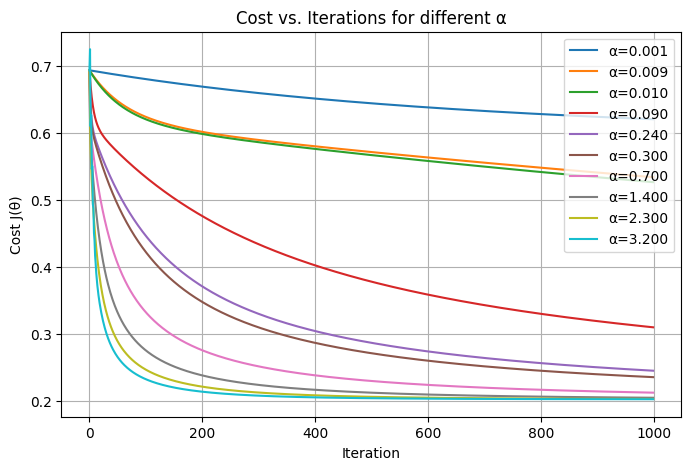

In [5]:
# ~ D ~ #
# plot cost vs. iteration for 10 different alpha values
alphas = [ 0.001, 0.009, 0.01, 0.09, 0.24, 0.3, 0.7, 1.4, 2.3, 3.2]
iterations = 1000

plt.figure(figsize=(8, 5))
for alpha in alphas:
    theta_temp = np.zeros_like(theta_init)
    theta_gd, J_hist = gradient_descent(X, y, theta_temp, alpha, iterations, log_cost=True)
    plt.plot(J_hist, label=f'α={alpha:.3f}')

plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost vs. Iterations for different α')
plt.legend()
plt.grid(True)
plt.show()

# best alpha for 1000 iterations is 3.2

In [ ]:
# ~ E ~ #
# Evaluate linear vs. quadratic classifiers on the provided test set
df_test = pd.read_csv("data\\email_data_test_2025.csv", usecols=['x1','x2','ytest'])
x1_test = df_test['x1'].values           
x2_test = df_test['x2'].values               
ytest = df_test['ytest'].values.reshape(-1,1) 
m_test = ytest.size

X_test = np.hstack([np.ones((m_test,1)), x1_test.reshape(-1,1), x2_test.reshape(-1,1)])               
X_test_quad = np.hstack([X_test, (x1_test**2).reshape(-1,1)])                                               
y_pred_lin = predict_label(X_test, theta_gd)   
y_pred_quad = predict_label(X_test_quad, theta_q)
 
correct_lin = int((y_pred_lin  == ytest).sum())
correct_quad  = int((y_pred_quad == ytest).sum())
acc_lin = correct_lin  / m_test * 100
acc_quad = correct_quad / m_test * 100

print(f"Linear classifier: {correct_lin}/{m_test} correct → accuracy = {acc_lin:.1f}%")
print(f"Quadratic classifier: {correct_quad}/{m_test} correct → accuracy = {acc_quad:.1f}%")

Linear classifier: 22/25 correct → accuracy = 88.0%
Quadratic classifier: 14/25 correct → accuracy = 56.0%
